<a href="https://colab.research.google.com/github/FarshadAmiri/Learning-NLP/blob/main/BBC_Texts_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Natural Language Processing**                              
BBC texts classification


In [41]:
import tensorflow as tf
import math
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [43]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))

153


In [44]:
data = pd.read_csv("https://github.com/FarshadAmiri/Learning-NLP/raw/main/BBC%20texts%20categories/bbc_texts_dataset.csv")
data.head(3)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...


In [45]:
texts_mod = []
for text in data['text']:
  for word in stopwords:
    word = ' ' + word + ' '
    text = text.replace(word, ' ')
  texts_mod.append(text)

data['text'] = texts_mod

data.head(3)

sentences = data['text']
labels = data['category']
    
print(len(labels))
print(len(sentences))
print('Labels are: ',[label for label in labels.unique()])

2225
2225
Labels are:  ['tech', 'business', 'sport', 'entertainment', 'politics']


In [46]:
data.head(3)

,category,text
0,tech,tv future hands viewers home theatre systems ...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary farrell gamble leicester say wil...


In [48]:
train_size = math.ceil(training_portion*len(sentences))

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print('Training size is',len(train_sentences))
print('Test size is',len(validation_sentences))

Training size is 1780
Test size is 445


In [58]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen= max_length, padding= padding_type, truncating= trunc_type)

print('train_sequences is a list with',len(train_sequences),'lists in it')
print('each train_sequences indices length is',len(train_sequences[1]))
print('train_padded is an array with shape of',train_padded.shape)

train_sequences is a list with 1780 lists in it
each train_sequences indices length is 200
train_padded is an array with shape of (1780, 120)


In [59]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen= max_length, padding= padding_type, truncating= trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 120)


In [60]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [61]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(input_dim=vocab_size, output_dim = embedding_dim, input_length= max_length),
  tf.keras.layers.GlobalMaxPooling1D(),
  # tf.keras.layers.LSTM(32, return_sequences=True),
  # tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.Dense(32, activation = 'relu'),
  tf.keras.layers.Dense(24, activation = 'relu'),
  tf.keras.layers.Dense(6, activation = 'softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_16 (Dense)             (None, 24)                792       
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 150       
Total params: 17,486
Trainable params: 17,486
Non-trainable params: 0
_________________________________________________________________


In [62]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs = num_epochs, 
                    validation_data=(validation_padded, validation_label_seq))

Epoch 1/30
56/56 [==============================] - 1s 6ms/step - loss: 1.7766 - accuracy: 0.1997 - val_loss: 1.7271 - val_accuracy: 0.2292
Epoch 2/30
56/56 [==============================] - 0s 4ms/step - loss: 1.6906 - accuracy: 0.2378 - val_loss: 1.5732 - val_accuracy: 0.3798
Epoch 3/30
56/56 [==============================] - 0s 4ms/step - loss: 1.4683 - accuracy: 0.5119 - val_loss: 1.2389 - val_accuracy: 0.5663
Epoch 4/30
56/56 [==============================] - 0s 4ms/step - loss: 1.1185 - accuracy: 0.6432 - val_loss: 0.9855 - val_accuracy: 0.6966
Epoch 5/30
56/56 [==============================] - 0s 4ms/step - loss: 0.8480 - accuracy: 0.7662 - val_loss: 0.7065 - val_accuracy: 0.8112
Epoch 6/30
56/56 [==============================] - 0s 4ms/step - loss: 0.5575 - accuracy: 0.8711 - val_loss: 0.4942 - val_accuracy: 0.8494
Epoch 7/30
56/56 [==============================] - 0s 4ms/step - loss: 0.3581 - accuracy: 0.9080 - val_loss: 0.4074 - val_accuracy: 0.8652
Epoch 8/30
56/56 [==

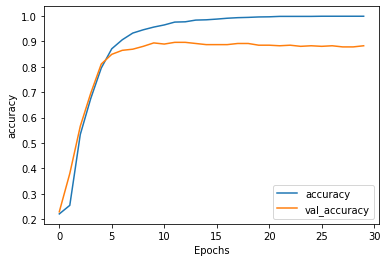

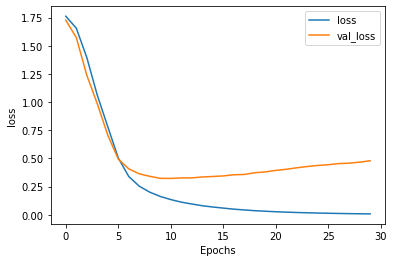

In [65]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [77]:
l = ['sdfsd','iukhk','yruytut']
'...'.join(l)

'sdfsd...iukhk...yruytut'

In [80]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    # return ' '.join([reverse_word_index.get(i, '?') for i in text])
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(train_padded[0]))
print('\n',train_sentences[0])
print('\n','Categorized as',labels[0])

tv future <OOV> <OOV> home theatre systems <OOV> high <OOV> <OOV> digital video <OOV> <OOV> <OOV> <OOV> way people watch tv will <OOV> different five years time according <OOV> <OOV> <OOV> annual consumer <OOV> show <OOV> <OOV> <OOV> new technologies will impact one favourite <OOV> us leading <OOV> <OOV> content will <OOV> <OOV> via home networks <OOV> <OOV> <OOV> companies broadband service <OOV> front <OOV> portable devices one <OOV> <OOV> technologies <OOV> digital personal video <OOV> <OOV> <OOV> set top <OOV> like us s <OOV> uk s <OOV> system allow people record <OOV> play <OOV> forward <OOV> tv <OOV> want <OOV> technology <OOV> much <OOV> tv also <OOV> in high <OOV> tv <OOV> big business japan us <OOV> take off

 tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new te

In [78]:
embedding = model.layers[0]
weights = embedding.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [ ]:
# Embedding projector 
# https://projector.tensorflow.org/

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')